                                    Error handling logging and  data  manipulation assignment
                                    

1 What is the difference between multi threading and multi processing.


Ans. The difference between multi-threading and multi-processing lies in how they achieve parallelism (doing multiple tasks at once) and how they use system resources like CPU and memory.

| **Aspect**                        | **Multithreading**                                                                                       | **Multiprocessing**                                                                                 |
| --------------------------------- | -------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------- |
| **Definition**                    | Running multiple threads (smaller units of a single process) concurrently within the **same process**.   | Running multiple **independent processes** simultaneously, each with its own memory space.          |
| **Memory usage**                  | Threads share the same memory space (less memory usage).                                                 | Each process has its own memory (more memory usage).                                                |
| **Data sharing**                  | Easier — all threads can access shared data directly.                                                    | Harder — processes need inter-process communication (IPC) like `Queue`, `Pipe`, or `shared memory`. |
| **Performance (CPU-bound tasks)** | Limited by the **Global Interpreter Lock (GIL)** in Python — only one thread runs Python code at a time. | Not affected by the GIL — true parallel execution on multiple CPU cores.                            |
| **Performance (I/O-bound tasks)** | Excellent — good for tasks that wait for I/O (like web requests, file I/O).                              | Overhead may be unnecessary for I/O tasks.                                                          |
| **Crash impact**                  | If one thread crashes, it can affect the whole process.                                                  | If one process crashes, others continue running independently.                                      |
| **Examples in Python**            | `threading` module                                                                                       | `multiprocessing` module                                                                            |


. Simple analogy:

. Multithreading = Multiple workers sharing the same workspace (they must      coordinate carefully).

. Multiprocessing = Each worker has their own separate office (no interference, but more resource usage).

. Example:

In [1]:
# Multithreading example
import threading

def task():
    print("Task running")

for _ in range(5):
    t = threading.Thread(target=task)
    t.start()


Task running
Task running
Task running
Task running
Task running


2 What are the challenges associated with  memory management in python.

Ans.Memory management in Python is mostly automatic — thanks to features like garbage collection and reference counting — but it still faces several challenges that developers should understand.

.  Key Challenges in Memory Management in Python

| **Challenge**                                    | **Explanation**                                                                                                                                                                                                                                                            |
| ------------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. Reference Cycles (Circular References)**    | Python uses **reference counting** to track when objects can be deleted. If two or more objects reference each other, their reference count never reaches zero — causing **memory leaks**. <br>👉 Example: two objects referring to each other even when no longer needed. |
| **2. Memory Leaks**                              | Memory that’s no longer needed but not released due to lingering references or circular dependencies. This can cause performance degradation in long-running programs.                                                                                                     |
| **3. Global Interpreter Lock (GIL) Constraints** | Although not directly a “leak,” the GIL restricts true parallelism in threads — leading to inefficient memory use in multithreaded CPU-bound programs.                                                                                                                     |
| **4. Fragmentation of Memory**                   | When many small objects are created and deleted, Python’s memory allocator (PyMalloc) can leave “holes” in memory. Over time, this **fragmentation** causes inefficient memory utilization.                                                                                |
| **5. Large Object Retention**                    | Python’s **memory allocator** doesn’t always return freed memory to the operating system, especially for large or frequently allocated objects. This means the process size can stay large even after freeing objects.                                                     |
| **6. Hidden References in C Extensions**         | Some C-based Python modules or libraries (like NumPy, Pandas, or custom extensions) can hold on to references improperly, preventing Python’s garbage collector from reclaiming memory.                                                                                    |
| **7. Improper Use of Caches and Globals**        | Using global variables, caches, or data structures (like lists or dicts) without clearing them properly keeps references alive unnecessarily, causing gradual memory bloat.                                                                                                |
| **8. Difficulty Debugging Memory Issues**        | Tracking down what’s holding references can be hard. Memory profiling tools (like `tracemalloc`, `gc` module, or `objgraph`) help — but interpreting results can be complex.                                                                                               |


.  Example of Circular Reference Problem

In [ ]:
class A:
    def __init__(self):
        self.b = None

class B:
    def __init__(self):
        self.a = None

a = A()
b = B()
a.b = b
b.a = a

del a
del b


. How Python Handles It

. Reference Counting: Immediate deallocation when reference count = 0.

. Garbage Collector (gc module): Detects and cleans up cyclic references.

. Memory Pooling (PyMalloc): Optimizes small object allocations.

. Best Practices to Manage Memory


. Use del to remove unused variables or objects.

. Use weak references (weakref module) to avoid circular dependencies.

. Use generators instead of loading large data into memory.

. Use gc.collect() manually for cyclic garbage cleanup (when necessary).

. Profile memory usage with tools like tracemalloc, objgraph, or memory_profiler.

3 Write a Python program that logs an error message to a log file when a division by zero exception occurs.

Ans. Program: Log Division by Zero Error


In [ ]:
import logging

# Configure logging
logging.basicConfig(
    filename='error_log.txt',        # Log file name
    level=logging.ERROR,             # Log only errors and above
    format='%(asctime)s - %(levelname)s - %(message)s'
)

def divide(a, b):
    try:
        result = a / b
        print(f"Result: {result}")
    except ZeroDivisionError as e:
        logging.error("Division by zero error occurred: %s", e)
        print("Error: Division by zero is not allowed.")

# Example usage
num1 = 10
num2 = 0

divide(num1, num2)


ERROR:root:Division by zero error occurred: division by zero


Error: Division by zero is not allowed.


.How it Works

1 The logging module is configured to:

. Write messages to a file named error_log.txt.

. Record only ERROR-level messages or higher.

. Include the timestamp, error level, and message.

2 In the divide() function:

. If b is zero, a ZeroDivisionError occurs.

. The exception is caught, logged, and a user-friendly message is printed.

4  Write a python program that reads  from one file  and writes its content  to another file.

Ans.  Program: Copy File Content

In [ ]:
# Program to read from one file and write its content to another file

# Specify file names
source_file = "source.txt"
destination_file = "destination.txt"

try:
    # Open source file in read mode
    with open(source_file, 'r') as src:
        # Read content from the source file
        content = src.read()

    # Open destination file in write mode
    with open(destination_file, 'w') as dest:
        # Write the content to the destination file
        dest.write(content)

    print(f"Contents of '{source_file}' have been copied to '{destination_file}' successfully.")

except FileNotFoundError:
    print(f"Error: The file '{source_file}' was not found.")
except IOError:
    print("Error: An I/O error occurred while reading or writing files.")


Error: The file 'source.txt' was not found.


 . How It Works:

 1 The program opens source.txt in read mode.

2 Reads all its content using .read().

3 Opens (or creates) destination.txt in write mode.

4 Writes the content from the source file into it.

5 Handles errors like missing files or I/O issues.

5 Write  a program that handles  both index  errors and key error using  a  try expect block.

Ans.

In [ ]:
# Program to handle IndexError and KeyError

try:
    # Example list and dictionary
    numbers = [10, 20, 30]
    data = {'name': 'Swarndeep', 'age': 21}

    # Try accessing invalid index and key
    print(numbers[5])         # This will cause IndexError
    print(data['address'])    # This will cause KeyError

except IndexError:
    print("Error: List index out of range!")

except KeyError:
    print("Error: The specified key does not exist in the dictionary!")

print("Program continues after handling the error.")


Error: List index out of range!
Program continues after handling the error.


6  What are  the  difference between  numpy arrays and python lists.  

Ans. Here are the main differences between NumPy arrays and Python lists:

| **Feature**           | **NumPy Array**                                                                  | **Python List**                                                  |
| --------------------- | -------------------------------------------------------------------------------- | ---------------------------------------------------------------- |
| **Library**           | Comes from the `numpy` module                                                    | Built-in data type in Python                                     |
| **Storage Type**      | Stores elements of **same data type** (homogeneous)                              | Can store elements of **different data types** (heterogeneous)   |
| **Memory Efficiency** | More memory-efficient; stored in **contiguous blocks**                           | Less memory-efficient; stores references to objects              |
| **Performance**       | Much **faster** for numerical computations due to C implementation               | **Slower** for numerical tasks                                   |
| **Operations**        | Supports **vectorized operations** (element-wise addition, multiplication, etc.) | Requires explicit loops for element-wise operations              |
| **Functionality**     | Offers many **mathematical and statistical functions**                           | Limited built-in operations                                      |
| **Dimensionality**    | Can be **multi-dimensional** (e.g., 2D, 3D arrays)                               | Typically **one-dimensional**, though can contain lists of lists |
| **Type Checking**     | Enforces a **single data type** for all elements                                 | Allows mixed types freely                                        |
| **Example Creation**  | `np.array([1, 2, 3])`                                                            | `[1, 2, 3]`                                                      |


. Example:

In [ ]:
import numpy as np

# NumPy array
arr = np.array([1, 2, 3])
print(arr + 10)   # Vectorized operation: [11 12 13]

# Python list
lst = [1, 2, 3]
print([x + 10 for x in lst])  # Manual iteration: [11, 12, 13]


[11 12 13]
[11, 12, 13]


7 Explain the difference between apply() and map() in pandas.

Ans. In Pandas, both apply() and map() are used to apply functions to data — but they differ in where and how they are used.

 1. map()

. Used on: A Series (single column).

. Purpose: Applies a function, dictionary, or mapping to each element in a Series.

. Syntax:

Series.map(func)

.Example:

In [3]:
import pandas as pd

s = pd.Series([1, 2, 3, 4])

# Apply a function to each element
print(s.map(lambda x: x * 2))


0    2
1    4
2    6
3    8
dtype: int64


. Can also take:
. A function
. A dictionary (for value replacement)
. A Series (for mapping)

 2. apply()

. Used on: A DataFrame or Series.

. Purpose: Applies a function along an axis (rows or columns).

. Syntax:
DataFrame.apply(func, axis=0 or 1)

. axis=0 → apply function to each column

. axis=1 → apply function to each row

. Example:

In [4]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# Apply a function to each column
print(df.apply(lambda x: x.max()))


A    3
B    6
dtype: int64


. Another example (row-wise):

In [5]:
df.apply(lambda row: row['A'] + row['B'], axis=1)


,0
0,5
1,7
2,9


.  Key Differences

| Feature             | `map()`                   | `apply()`           |
| ------------------- | ------------------------- | ------------------- |
| Works on            | Series                    | DataFrame or Series |
| Function applied to | Each element              | Each row or column  |
| Accepts             | Function, dict, or Series | Function only       |
| Axis parameter      | ❌ No                      | ✅ Yes (`axis=0/1`)  |
| Output type         | Series                    | Series or DataFrame |


8 Create a histogram using seaborn to visualize a distribution.

Ans.Here’s a simple example of how to create a histogram using Seaborn to visualize a distribution

. Python Code Example:

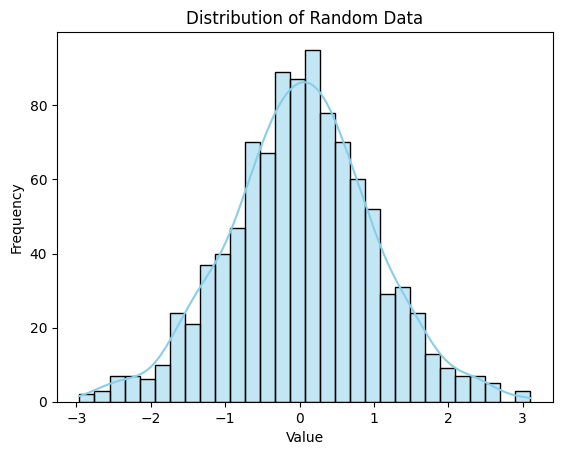

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
data = np.random.randn(1000)  # 1000 random numbers from a normal distribution

# Create a histogram using Seaborn
sns.histplot(data, bins=30, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


 Explanation:

 . np.random.randn(1000) → generates 1000 random values from a normal (Gaussian) distribution.

sns.histplot() → creates the histogram.

. bins=30 → number of bars (bins) in the histogram.

. kde=True → overlays a Kernel Density Estimate (KDE) curve to show the distribution shape.

. color='skyblue' → sets the bar color.

. plt.title(), plt.xlabel(), and plt.ylabel() → add labels for clarity.


9 Use pandas to load  a csv file and display its first five rows.

Ans. Here’s how you can use Pandas to load a CSV file and display its first five rows




.  Step-by-Step Explanation:

1 Importing the pandas library

. pandas is a powerful Python library for data manipulation and analysis.

. The alias pd is used as a shorthand — so instead of typing pandas.read_csv, we can write pd.read_csv.

. This is a common convention in Python programming.

2 Loading the CSV file

.pd.read_csv() is a pandas function used to read a CSV (Comma-Separated Values) file and convert it into a DataFrame.

. A DataFrame is a special pandas object similar to an Excel sheet — it has rows and columns.

. The 'data.csv' should be replaced with:

. The actual file name (if it’s in the same folder as your Python script)

Or a full file path like:

3  Displaying the first five rows

. df.head() returns the first five rows of your dataset by default.

. You can also specify how many rows to view, e.g. df.head(10) shows the first 10 rows.

.Printing it using print() displays the output neatly in your terminal or IDE.

✅ Example:

. Suppose your data.csv file looks like this:

| ID | Name  | Age | City    |
| -- | ----- | --- | ------- |
| 1  | John  | 25  | Delhi   |
| 2  | Riya  | 22  | Mumbai  |
| 3  | Amit  | 27  | Pune    |
| 4  | Neha  | 24  | Chennai |
| 5  | Arjun | 29  | Kolkata |
| 6  | Ravi  | 30  | Jaipur  |


10 Calculate the correlation matrix using  seaborn and visualize it with a  heat  map.

Ans. Here’s how you can calculate the correlation matrix of a dataset and visualize it using a heatmap in Seaborn, step by step:

.  Step-by-Step Explanation:

1 Import Libraries



In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


. pandas → For handling and analyzing data.

. seaborn → For creating beautiful and easy-to-read visualizations.

. matplotlib.pyplot → Used for displaying the graph.

2 Load Your CSV File

. Loads your CSV dataset into a pandas DataFrame.

. You can replace 'data.csv' with your actual file name or path.

3 Calculate the Correlation Matrix

In [22]:
corr_matrix = df.corr(numeric_only=True)


. Calculates the correlation between all numerical columns.

. The result is a square matrix showing how strongly each pair of variables is related.

. Correlation values range from:

. +1 → Strong positive correlation

. 0 → No correlation

. −1 → Strong negative correlation

4 Visualize with a Heatmap:

<Axes: >

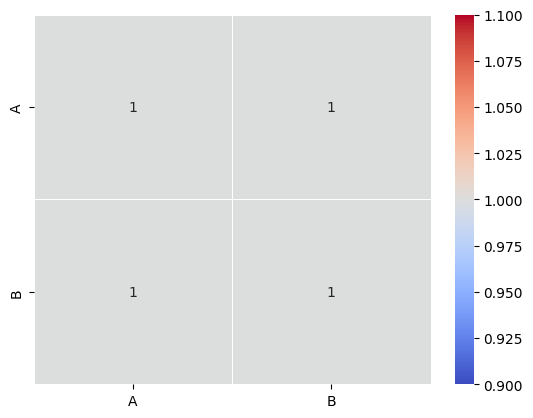

In [23]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


. annot=True → Displays the numeric correlation values in each cell.

. cmap='coolwarm' → Sets the color scheme (blue to red).

5 Display the Plot

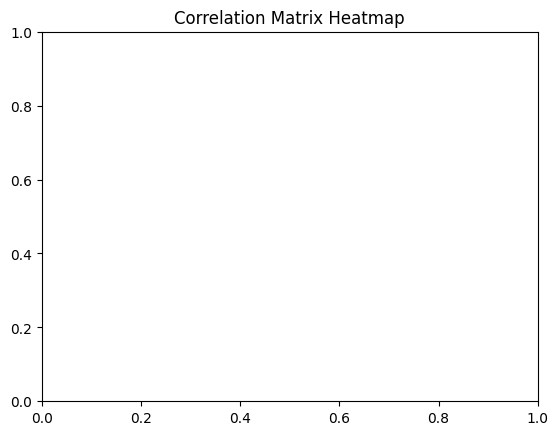

In [24]:
plt.title('Correlation Matrix Heatmap')
plt.show()


. Adds a title and displays the heatmap.

.  Example Output (Visualization):

. Red areas → Strong positive correlation

. Blue areas → Strong negative correlation

. White areas → Weak or no correlation